In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [4]:
df=pd.read_csv('DNI_hr.csv')
df = df[["Date","Direct Normal [W/m^2]"]]
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Direct Normal [W/m^2]
0,2008-06-01 00:00:00,0.000000
1,2008-06-01 01:00:00,0.000000
2,2008-06-01 02:00:00,0.000000
3,2008-06-01 03:00:00,0.000000
4,2008-06-01 04:00:00,12.084972
...,...,...
48955,2013-12-31 19:00:00,0.000000
48956,2013-12-31 20:00:00,0.000000
48957,2013-12-31 21:00:00,0.000000
48958,2013-12-31 22:00:00,0.000000


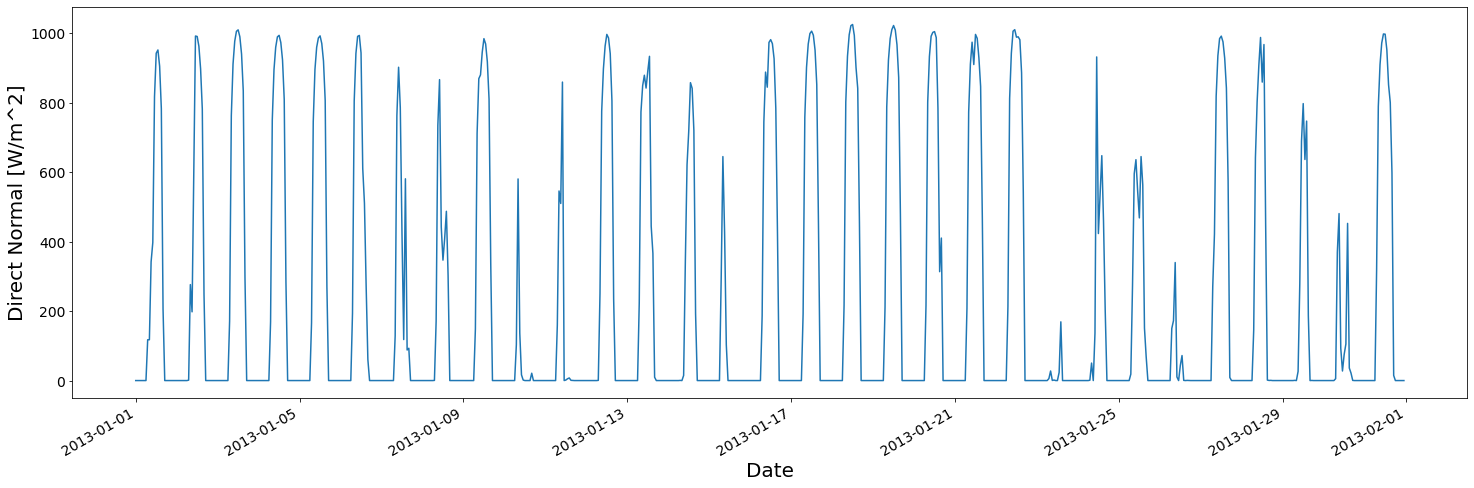

In [9]:
from datetime import datetime
plt.figure(figsize=(25,8))

df_new = df.loc[(df['Date'] >= datetime(2013, 1, 1)) & (df['Date'] < datetime(2013, 2, 1))]
plt.plot(df_new['Date'], df_new['Direct Normal [W/m^2]'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Direct Normal [W/m^2]', fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.gcf().autofmt_xdate()


plt.show()

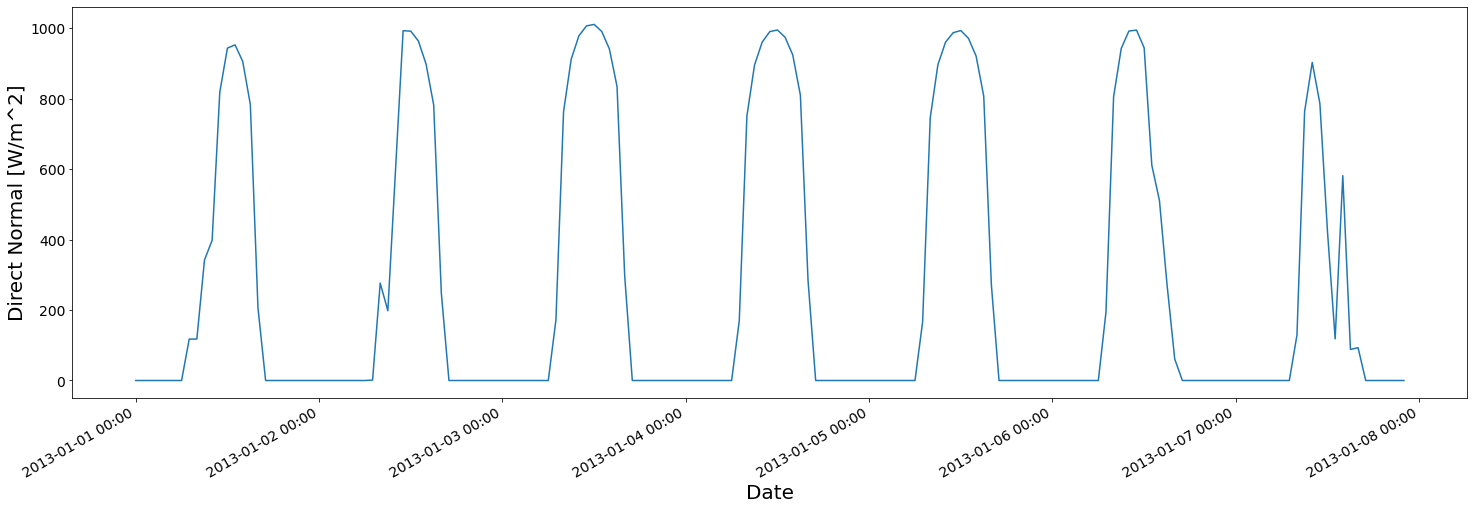

In [13]:
from datetime import datetime
from matplotlib.dates import DateFormatter
plt.figure(figsize=(25,8))

df_new = df.loc[(df['Date'] >= datetime(2013, 1, 1,0,0)) & (df['Date'] < datetime(2013, 1, 7,23,0))]
plt.plot(df_new['Date'], df_new['Direct Normal [W/m^2]'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Direct Normal [W/m^2]', fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

date_format = DateFormatter("%Y-%m-%d %H:%M")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()


plt.show()

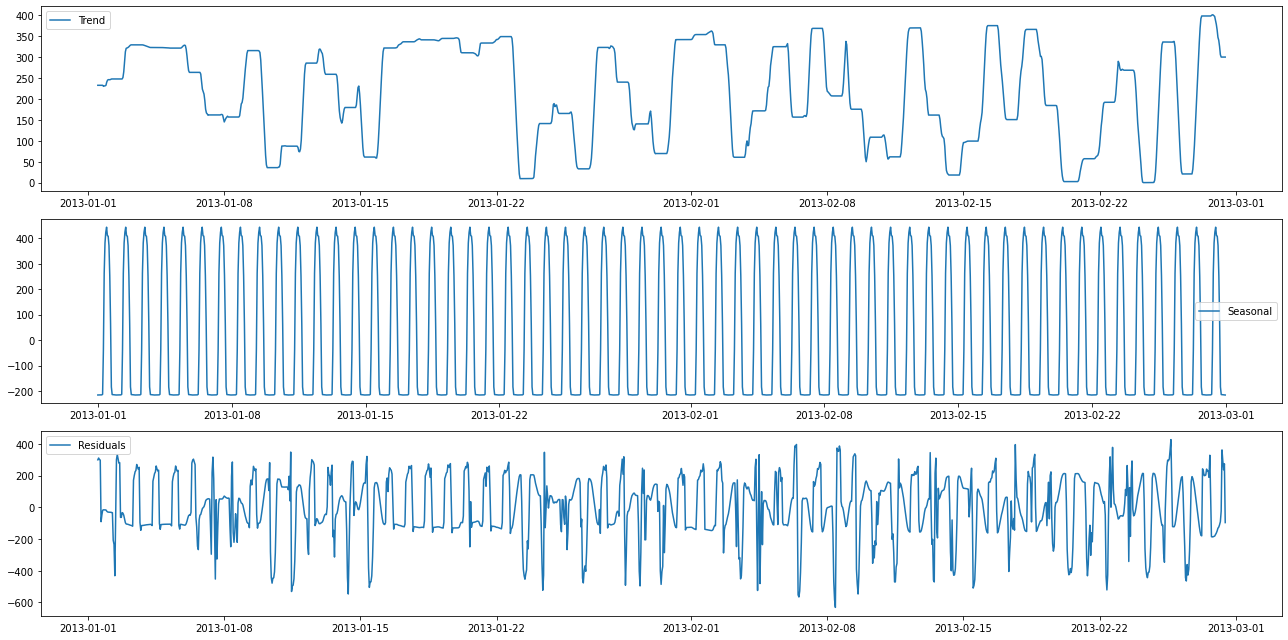

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_new = df.loc[(df['Date'] >= datetime(2013, 1, 1)) & (df['Date'] < datetime(2013, 3, 1))]
df_new.set_index('Date', inplace=True)
result = seasonal_decompose(df_new['Direct Normal [W/m^2]'], model='additive', period=24)
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

# Plot the decomposed components
plt.figure(figsize=(18,9))



plt.subplot(3, 1, 1)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [26]:
adf_test = adfuller(df['Direct Normal [W/m^2]'])

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -25.07432477382046
p-value: 0.0


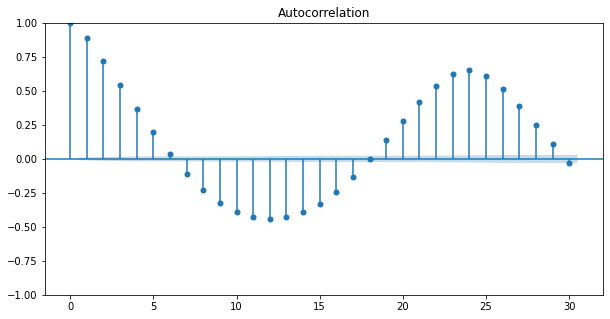

In [53]:
plot_acf(df['Direct Normal [W/m^2]'], lags=30)

fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()

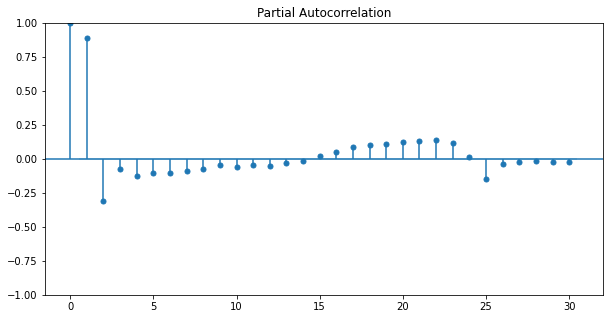

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['Direct Normal [W/m^2]'], lags=30)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()